In [1]:
%load_ext autoreload

In [2]:
import times_series_learning as tsl
import server_profile_learning as spl
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import datetime as dt
import time
from logreader import read_dir
from logparser import parse_all
from loganalyzer import MessageLogAnalyzer, describe, print_description, print_clusters
import class_time_series
import pandas as pd
import numpy as np
import sortedcontainers
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%autoreload 

In [3]:
LogPath = '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/'
p = class_time_series.GetServerData(LogPath)
ServerName = p.ServerList()

In [4]:
ServerName.columns

Index(['qvipnbdora02', 'qvipnbdora04', 'qvipnbusin02', 'qvipnmonlx06',
       'qvipnmonlx10', 'qvipnmonlx14', 'qvipnmonlx16', 'qviqbkarfs02',
       'qviqbocpno12', 'qviqbocpno14', 'qvirbkarfs02', 'qvirbkarno10',
       'qvirbkarno12', 'qvirbkarno14', 'qvirbkarno16', 'qvirbkarno18',
       'qvirbloges02', 'qvirbsapcr02', 'qvircmqsvr02', 'qvirctbems04',
       'qvirnbdora02', 'qvirnbdora04', 'qvirnbusin02', 'qvitbbautin02',
       'qvitbbautin04', 'qvitbbautin06', 'qvitbcjbod02', 'qvitntbems02',
       'qvitsys6'],
      dtype='object')

In [5]:
ServerName.head()

,qvipnbdora02,qvipnbdora04,qvipnbusin02,qvipnmonlx06,qvipnmonlx10,qvipnmonlx14,qvipnmonlx16,qviqbkarfs02,qviqbocpno12,qviqbocpno14,...,qvirctbems04,qvirnbdora02,qvirnbdora04,qvirnbusin02,qvitbbautin02,qvitbbautin04,qvitbbautin06,qvitbcjbod02,qvitntbems02,qvitsys6
2017-09-24,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,0,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,0,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...
2017-09-25,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,0,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...
2017-09-26,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...
2017-09-27,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox/DeepLearning/ProjetFilRou...,/home/joseph/Dropbox

In [6]:
ServerName.shape

(33, 29)

In [7]:
#Select a full week for learning even if not contiguous date
date_available = ServerName[ServerName['qvipnbdora04'] != 0].index
# let 's del the 2017-10-19
#date_available = np.delete(date_available, np.argwhere(date_available == '2017-10-19')[0])
# bug from 19:00 for 284 minutes without logs
print(type(date_available))
# let's take now the first full week
date_ind = np.empty(7,dtype=dt.date)
date_available_2 = np.empty(date_available.shape[0]-7,dtype=dt.date)
for i in range(7):
    d = date_available[int(np.argwhere(date_available.weekday ==i)[0])]
    date_available = np.delete(date_available, np.argwhere(date_available == d)[0])
    date_ind[i]= dt.date.fromtimestamp(d.timestamp())
date_available_2 =[dt.date.fromtimestamp(d.timestamp()) for d in date_available]
print(date_available_2)
print(date_ind)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
[datetime.date(2017, 10, 1), datetime.date(2017, 10, 2), datetime.date(2017, 10, 3), datetime.date(2017, 10, 4), datetime.date(2017, 10, 5), datetime.date(2017, 10, 6), datetime.date(2017, 10, 7), datetime.date(2017, 10, 8), datetime.date(2017, 10, 9), datetime.date(2017, 10, 10), datetime.date(2017, 10, 11), datetime.date(2017, 10, 12), datetime.date(2017, 10, 13), datetime.date(2017, 10, 14), datetime.date(2017, 10, 15), datetime.date(2017, 10, 16), datetime.date(2017, 10, 17), datetime.date(2017, 10, 18), datetime.date(2017, 10, 19), datetime.date(2017, 10, 20), datetime.date(2017, 10, 21), datetime.date(2017, 10, 22), datetime.date(2017, 10, 23), datetime.date(2017, 10, 24), datetime.date(2017, 10, 25), datetime.date(2017, 10, 26)]
[datetime.date(2017, 9, 25) datetime.date(2017, 9, 26)
 datetime.date(2017, 9, 27) datetime.date(2017, 9, 28)
 datetime.date(2017, 9, 29) datetime.date(2017, 9, 30)
 datetime.date(2017, 9, 24)]


In [8]:
log_data_list = ServerName.loc[:,'qvipnbdora04'].values
log_data_list = [i for i in log_data_list if i !=0 ]
log_data_list

['/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170924.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170925.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170926.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170927.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170928.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170929.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20170930.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20171001.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdora04.20171002.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/servers/qvipnbdo

In [9]:
#Log Clustering

analyzer = MessageLogAnalyzer()

# Import des logs
logs = read_dir('../logs/servers/*qvipnbdora04*')

# Parsing des logs en df
df_log = parse_all(logs)

df_log.to_csv('dataframe.csv')

[Success] Logs parsed within 2.12s


In [10]:
df_log = pd.read_csv('dataframe.csv')
df_log.head()

/home/joseph/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
0,2017-10-20 10:09:06,qvipnbdora04,kernel:,Initializing,cgroup,subsys,cpuset,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-20 10:09:06,qvipnbdora04,kernel:,Initializing,cgroup,subsys,cpu,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-10-20 10:09:06,qvipnbdora04,kernel:,Linux,version,339.275.859-307.3.307.el275.x86_64,(mockbuild@x86-029.build.eng.bos.redhat.com),(gcc version 4.4.7 20120313 (Red Hat 4.4.7-9),(GCC),),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-20 10:09:06,qvipnbdora04,kernel:,Command,line:,ro,rdloaddriver,megaraid_sas,rdloaddriver,qla2xxx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-10-20 10:09:06,qvipnbdora04,kernel:,KERNEL,supported,cpus:,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# I have to preprocess the dataframe, put timestamp in index in order to get
# the 3 datasets (1 for profiling, 2nd to set distributionn, 3rd to test)
df_log.index = pd.to_datetime(df_log.timestamp, format='%Y-%m-%d %H:%M:%S')
df_log = df_log.sort_index()

In [12]:
date_profile = [t.isoformat() for t in date_ind]
date_train = [t.isoformat() for t in date_available_2]
date_profile

['2017-09-25',
 '2017-09-26',
 '2017-09-27',
 '2017-09-28',
 '2017-09-29',
 '2017-09-30',
 '2017-09-24']

In [13]:
date_train

['2017-10-01',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-05',
 '2017-10-06',
 '2017-10-07',
 '2017-10-08',
 '2017-10-09',
 '2017-10-10',
 '2017-10-11',
 '2017-10-12',
 '2017-10-13',
 '2017-10-14',
 '2017-10-15',
 '2017-10-16',
 '2017-10-17',
 '2017-10-18',
 '2017-10-19',
 '2017-10-20',
 '2017-10-21',
 '2017-10-22',
 '2017-10-23',
 '2017-10-24',
 '2017-10-25',
 '2017-10-26']

In [14]:
#resample nous demande une semaine contigu
mask = (df_log.index >= date_profile[6]) & (df_log.index <= date_profile[5])
data_profile = df_log.loc[mask]
data_profile.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-24 00:00:54,2017-09-24 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
len(data_profile['2017-09-29'])

17974

In [22]:
distribution_init = sortedcontainers.SortedDict(sortedcontainers.SortedList())
for i in range(7):
    distribution_init[i]=sortedcontainers.SortedList([0,np.inf])

In [23]:
# Server Profile Learning (data, parameters, distribution, distribution_period, level_threshold)
%autoreload 
period = 1
m_avg_period = 5
dist_period = 15
dist_radius = 5
parameters = np.asarray([period, m_avg_period, dist_period, dist_radius])
distribution_period = 60*24 # 1 distribution for each day
level_threshold = 1e-2 # For defining outliers
distribution = distribution_init
processus = True

In [24]:
server_profile = spl.ServerProfileLearning(data_profile,parameters, distribution,distribution_period,level_threshold, processus)
server_profile.set_profile()

Learning Serverqvipnbdora04 Done in 1.3469529151916504


In [25]:
server_profile.server_profile.keys()

dict_keys(['qvipnbdora04_general'])

In [26]:
server_profile.server_profile['qvipnbdora04_general'].max_spread

61

In [27]:
server_profile.measures[0].items()

dict_items([('Area_Difference', []), ('Max_Spread', [])])

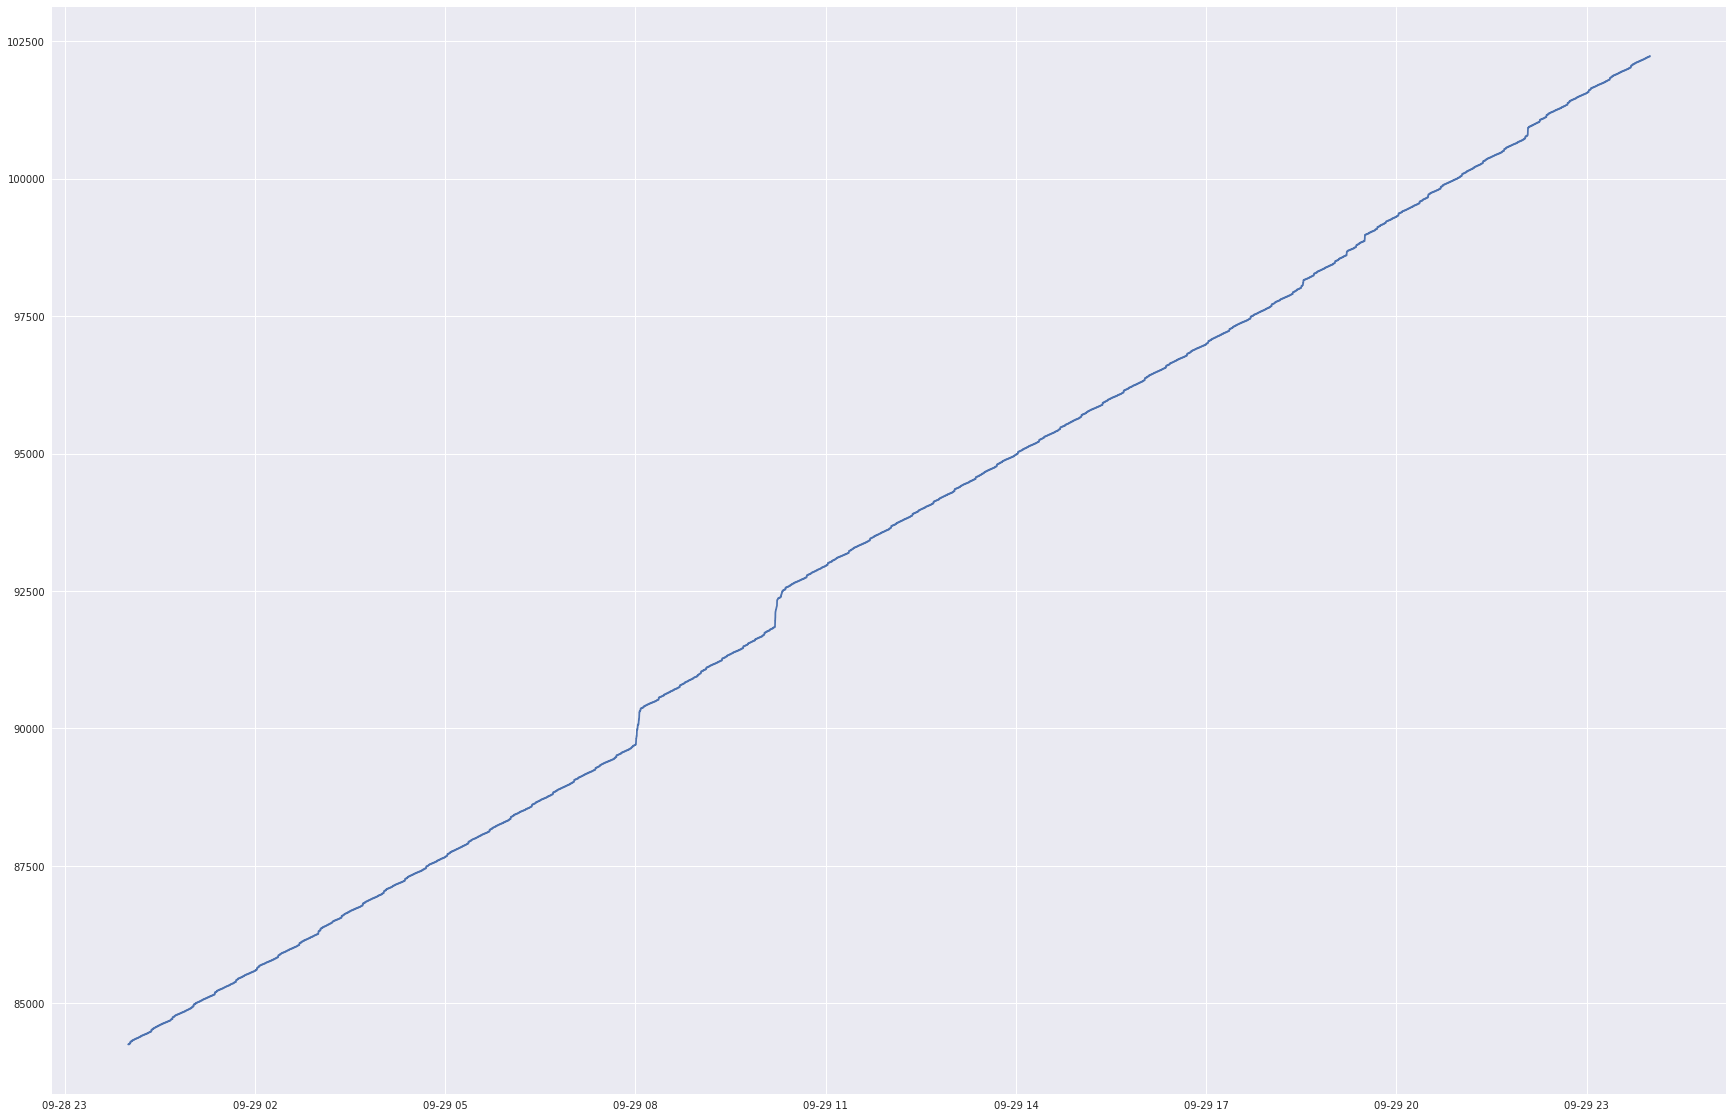

In [28]:
plt.figure(figsize=(30,20))
plt.plot(server_profile.server_profile['qvipnbdora04_general'].profile['2017-09-29'])

In [29]:
mask = (df_log.index >= date_train[0]) & (df_log.index <= date_train[17])
data = df_log.loc[mask]

In [30]:
data.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01 00:00:54,2017-10-01 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# learning the distribution hope we do not have any anomaly
%autoreload 
distribution_init = sortedcontainers.SortedDict(sortedcontainers.SortedList())
for i in range(7):
    distribution_init[i]=sortedcontainers.SortedList([0,np.inf])
server_profile.verbose = False
server_profile.level_threshold = 1e-6
server_profile.distribution = distribution_init
server_profile.processus = True
start_date = data.index[0]


In [32]:
i=0
start =time.time()
while start_date + dt.timedelta(seconds=server_profile.parameters[0,2]*60) < data.index[-1]:
    day = start_date.day
    data_to_compute = data.loc[start_date:(start_date + dt.timedelta(seconds=server_profile.parameters[0,2]*60))]
    anomaly, max_spread, min_spread, d, date, threshold, quant = server_profile.process_distance(data_to_compute)
    start_date = start_date + dt.timedelta(minutes=1)
    if start_date.day > day:
        period = time.time()-start
        print("day "+str(day)+" accomplished in " +str(period))
        start = time.time()
    i+=1

day 1 accomplished in 108.42398738861084
day 2 accomplished in 107.19506239891052
day 3 accomplished in 106.97533845901489
day 4 accomplished in 107.66491031646729
day 5 accomplished in 108.01402258872986
day 6 accomplished in 109.68374824523926
day 7 accomplished in 107.96987104415894
day 8 accomplished in 108.30523896217346
day 9 accomplished in 108.76933431625366
day 10 accomplished in 106.95132160186768
day 11 accomplished in 111.42361950874329
day 12 accomplished in 109.0090925693512
day 13 accomplished in 108.05142164230347
day 14 accomplished in 110.37319946289062
day 15 accomplished in 110.56642484664917
day 16 accomplished in 110.59619092941284


In [33]:
server_profile.distribution[0].remove(np.inf)
server_profile.distribution[1].remove(np.inf)
server_profile.distribution[2].remove(np.inf)
server_profile.distribution[3].remove(np.inf)
server_profile.distribution[4].remove(np.inf)
server_profile.distribution[5].remove(np.inf)
server_profile.distribution[6].remove(np.inf)

No handles with labels found to put in legend.


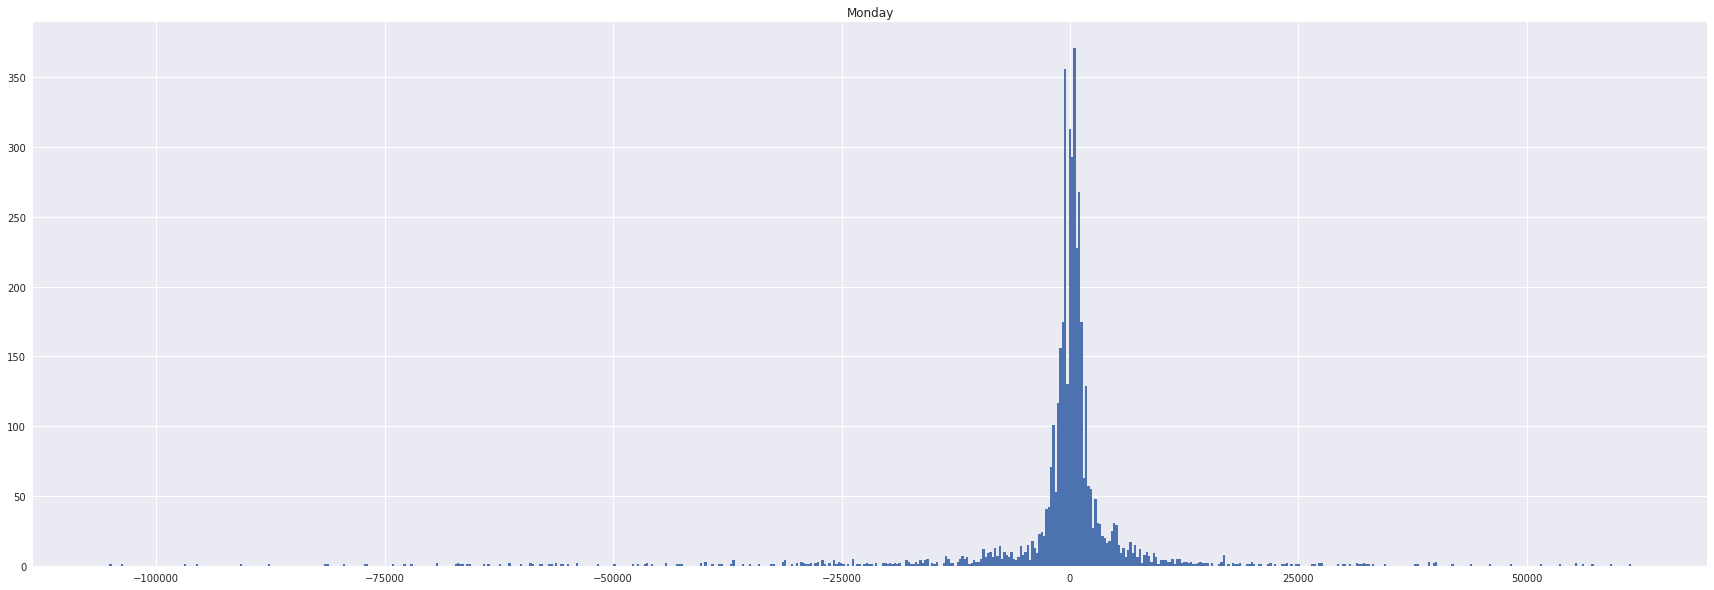

In [34]:
# distribution jour 
import calendar
plt.figure(figsize=(30,10))
plt.hist(server_profile.distribution[0], bins = 'auto')
plt.title(calendar.day_name[0])
plt.legend()
plt.show()

No handles with labels found to put in legend.


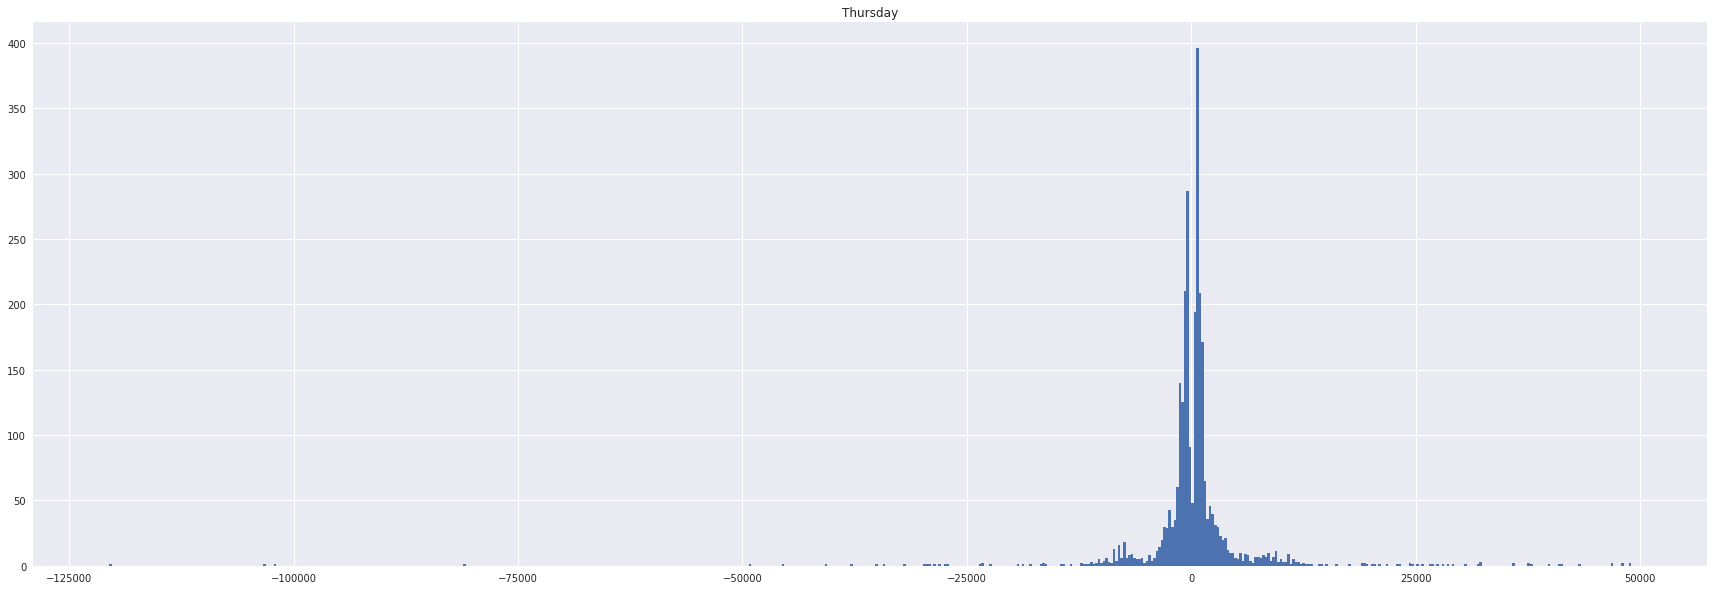

In [35]:
import calendar
plt.figure(figsize=(30,10))
plt.hist(server_profile.distribution[3], bins ='auto')
plt.title(calendar.day_name[3])
plt.legend()
plt.show()

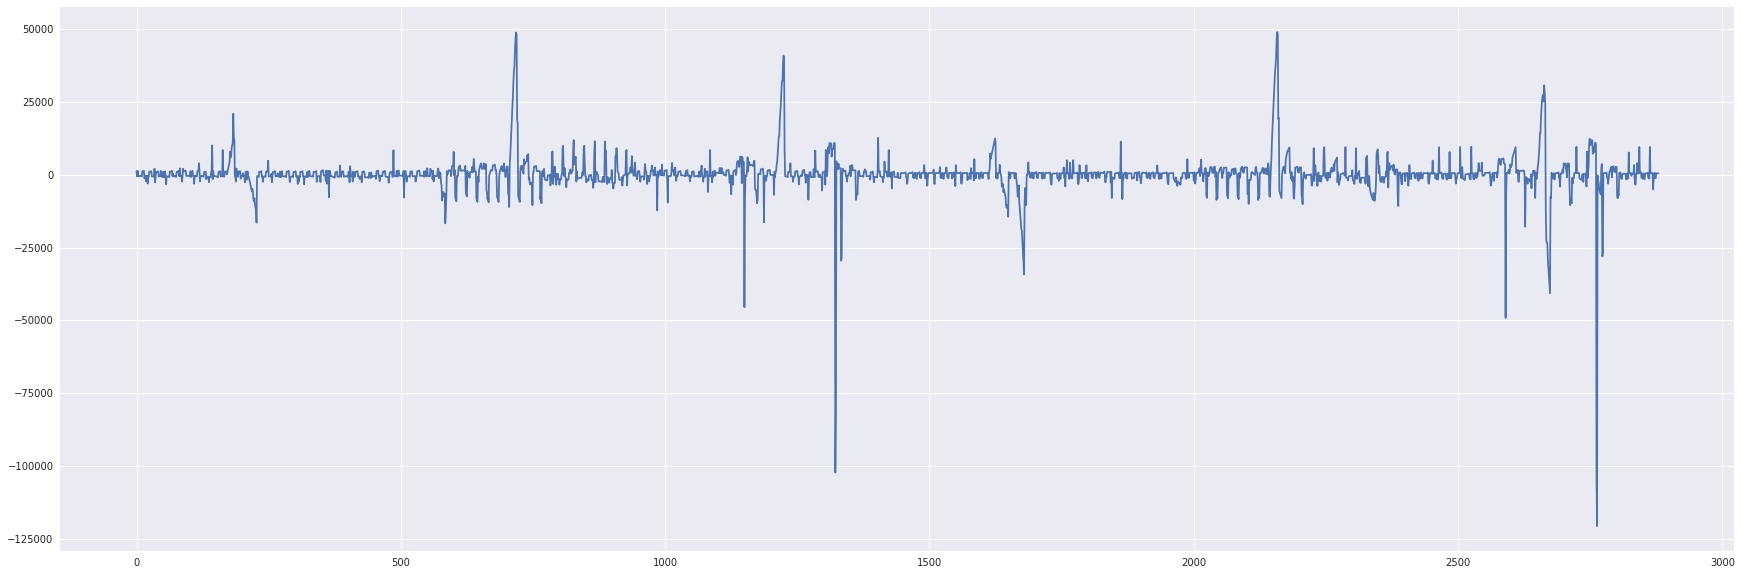

In [39]:
plt.figure(figsize=(30,10))
plt.plot(range(len(server_profile.measures[3]['Area_Difference'])),server_profile.measures[3]['Area_Difference'] )

In [46]:
#resample nous demande une semaine contigu
mask = (df_log.index >= date_train[18])
data_train = df_log.loc[mask]
data_train.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-19 00:00:54,2017-10-19 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-19 00:00:54,2017-10-19 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-19 00:00:54,2017-10-19 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-19 00:00:54,2017-10-19 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,closed,for,user,oracle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-19 00:00:54,2017-10-19 00:00:54,qvipnbdora04,su:,pam_unix(su:session):,session,opened,for,user,oracle,by,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
server_profile.processus = True
server_profile.train_mode = False
level_threshold = 0.01%
start_date = data_train.index[0]
i=0
start =time.time()
while start_date + dt.timedelta(seconds=server_profile.parameters[0,2]*60) < data_train.index[-1]:
    day = start_date.day
    data_to_compute = data_train.loc[start_date:(start_date + dt.timedelta(seconds=server_profile.parameters[0,2]*60))]
    anomaly, max_spread, min_spread, d, date, threshold, quant = server_profile.process_distance(data_to_compute)
    start_date = start_date + dt.timedelta(minutes=1)
    if start_date.day > day:
        period = time.time()-start
        print("day "+str(start_date)+" accomplished in " +str(period))
        start = time.time()
    i+=1

Alert Anomaly detected, the distance is in the 0.01
Timestamp is: 2017-10-19 11:50:54
Area difference value is :  21683.0


ValueError: If using all scalar values, you must pass an index

In [72]:
from collections import defaultdict
anomaly = defaultdict(list)
anomaly['Area_Difference'] = 5
anomaly['Timestamp'] = 10
d = pd.DataFrame([anomaly])
d.head()



,Area_Difference,Timestamp
0,5,10


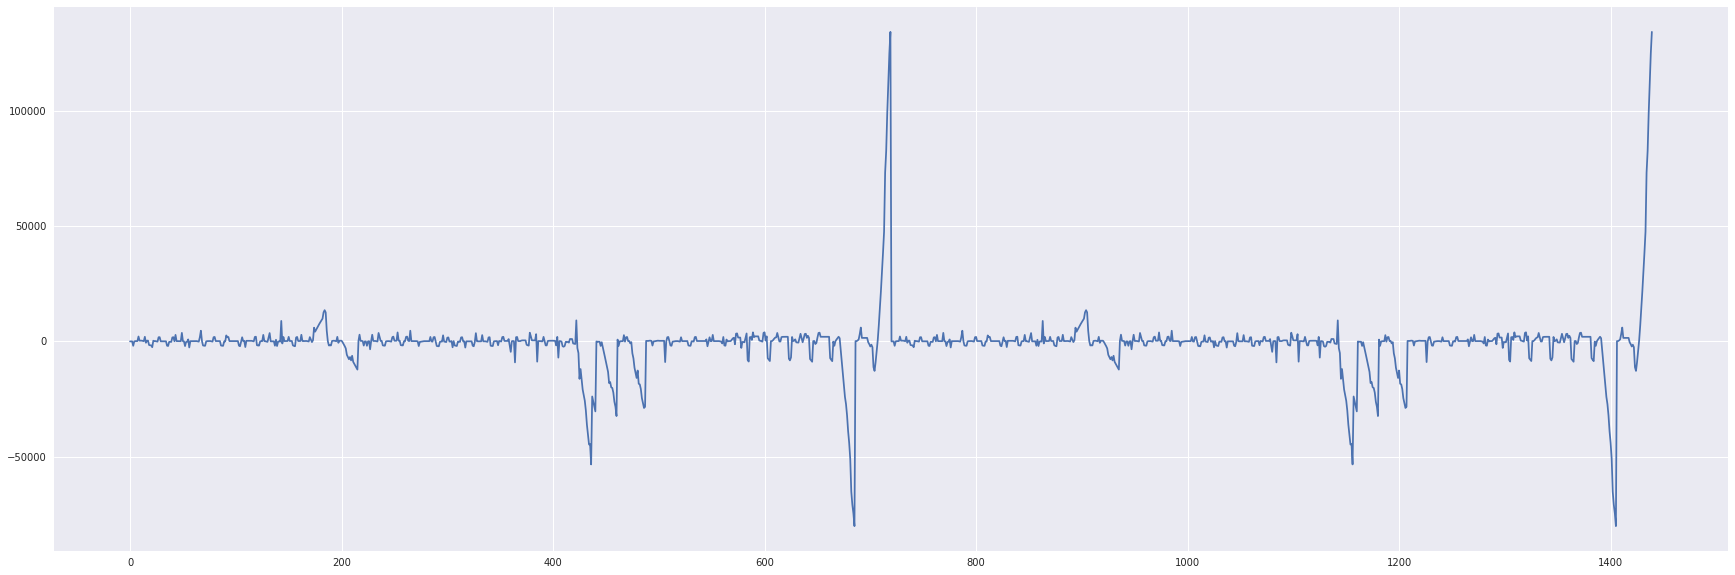

In [47]:
plt.figure(figsize=(30,10))
plt.plot(range(len(server_profile.measures[3]['Area_Difference'][1440:])),server_profile.measures[3]['Area_Difference'][1440:] )

In [127]:
data.index = pd.to_datetime(data.timestamp, format='%Y-%m-%d %H:%M:%S')
data_rs= data.drop(data.columns[1:len(data.columns) - 1], axis=1)
d_min = data[date_train[1]].resample('1S').count().cumsum()['timestamp'].values
d_min = pd.DataFrame(d_min, columns=['intensity'])

In [128]:
date_train[0]

'2017-10-01'

In [129]:
d_min.head()

,intensity
0,8
1,8
2,8
3,8
4,8


In [130]:
mask = (server_profile.server_profile['qvipnbdora04_general'].profile.index.weekday == 0) & (server_profile.server_profile['qvipnbdora04_general'].profile.index.hour <= 2) 
start_date = server_profile.server_profile['qvipnbdora04_general'].profile.loc[mask,'timestamp'].index[0]


In [131]:
server_profile.server_profile['qvipnbdora04_general'].profile.loc[start_date: start_date + dt.timedelta(seconds=3600*24),'timestamp'].values

array([16656., 16656., 16656., ..., 33500., 33500., 33500.])

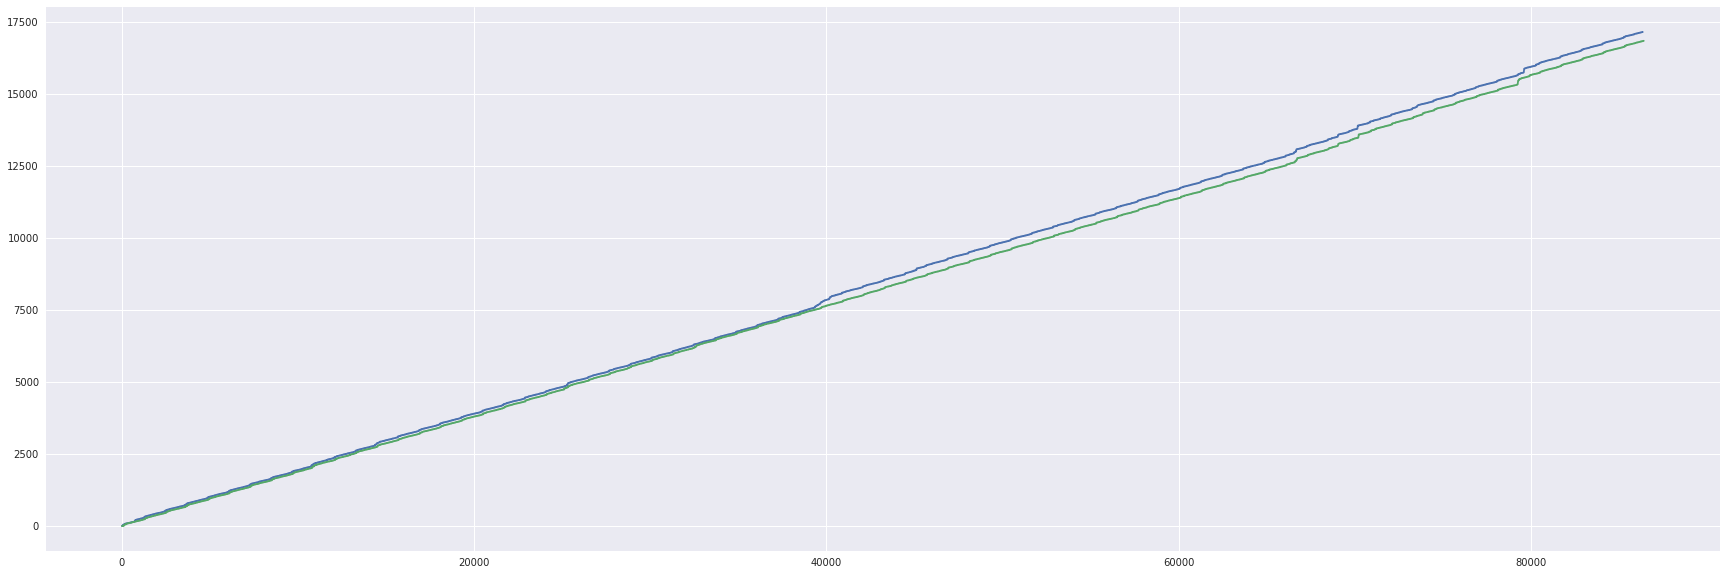

In [135]:
plt.figure(figsize=(30,10))
plt.plot(d_min.loc[:3600*24,'intensity'])
plt.plot(server_profile.server_profile['qvipnbdora04_general'].profile.loc[start_date: start_date + dt.timedelta(seconds=3600*24),'timestamp'].values
         -server_profile.server_profile['qvipnbdora04_general'].profile.loc[start_date-dt.timedelta(seconds=1), 'timestamp'])
plt.show()

In [128]:
date_profile

['2017-09-25',
 '2017-09-26',
 '2017-09-27',
 '2017-09-28',
 '2017-09-29',
 '2017-09-30',
 '2017-09-24']

In [129]:
date_train

['2017-10-01',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-05',
 '2017-10-06',
 '2017-10-07',
 '2017-10-08',
 '2017-10-09',
 '2017-10-10',
 '2017-10-11',
 '2017-10-12',
 '2017-10-13',
 '2017-10-14',
 '2017-10-15',
 '2017-10-16',
 '2017-10-17',
 '2017-10-18',
 '2017-10-19',
 '2017-10-20',
 '2017-10-21',
 '2017-10-22',
 '2017-10-23',
 '2017-10-24',
 '2017-10-25',
 '2017-10-26']

In [136]:
server_profile.distribution[6]

SortedList([-1621800.0, -1621800.0, -1621800.0, -1621800.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -810900.0, -432000.0, -432000.0, -432000.0, -432000.0, 0, 44592720.0, 44690976.0, 45658380.0, 45719580.0, 45976083.0, 46198320.0, 47387283.0, 48742680.0, 50023380.0, 50161980.0, 50568780.0, 51502105.0, 53465880.0, 54369480.0, 54912192.0, 55216476.0, 55350480.0, 56169480.0, 56999304.0, 58347480.0, 62067205.0, 63955380.0, 65138040.0, 71406522.0, 72302952.0, 73590822.0, inf])